# Eleições presidenciais em João Pessoa - 2º turno

Este notebook apresenta o resultado das eleicões presidenciais em João Pessoa (PB) no 2º turno por local de votação, bem como as etapas que segui para obter o resultado a partir dos boletins de urna e da base de eleitorado com os locais de votação disponibilizados no site do TSE.

O objetivo é conseguir ver onde cada candidato se saiu melhor de acordo com a região da cidade, obtendo um nível de detalhe maior do que aquele observado no agregado por zona eleitoral.

### Mapa final - 2º turno

Pontos em tons azuis onde Bolsonaro venceu. Pontos em tons vermelhos onde Lula venceu. Quando a cor é mais escura, significa que o candidato obteve mais de 55% dos votos válidos. A cor cinza representa empate.

Clique no ponto para obter os detalhes.

In [48]:
m

## Procedimento

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Boletins de urna

Base dos boletins de urna do TSE para a Paraíba, disponível em https://dadosabertos.tse.jus.br/dataset/resultados-2022-boletim-de-urna.

In [2]:
df = pd.read_csv('bweb_2t_PB.csv', encoding='latin-1', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76363 entries, 0 to 76362
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DT_GERACAO                   76363 non-null  object 
 1   HH_GERACAO                   76363 non-null  object 
 2   ANO_ELEICAO                  76363 non-null  int64  
 3   CD_TIPO_ELEICAO              76363 non-null  int64  
 4   NM_TIPO_ELEICAO              76363 non-null  object 
 5   CD_PLEITO                    76363 non-null  int64  
 6   DT_PLEITO                    76363 non-null  object 
 7   NR_TURNO                     76363 non-null  int64  
 8   CD_ELEICAO                   76363 non-null  int64  
 9   DS_ELEICAO                   76363 non-null  object 
 10  SG_UF                        76363 non-null  object 
 11  CD_MUNICIPIO                 76363 non-null  int64  
 12  NM_MUNICIPIO                 76363 non-null  object 
 13  NR_ZONA         

Filtra apenas algumas colunas de interesse, cidade de João Pessoa e eleição presidencial.

In [4]:
df = df[df['NM_MUNICIPIO'] == 'JOÃO PESSOA']
df = df[df['DS_ELEICAO'] == 'Eleição Geral Federal 2022']
df = df[['NR_ZONA', 'NR_SECAO', 'NM_VOTAVEL', 'QT_VOTOS', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 0 to 76358
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NR_ZONA            5806 non-null   int64 
 1   NR_SECAO           5806 non-null   int64 
 2   NM_VOTAVEL         5806 non-null   object
 3   QT_VOTOS           5806 non-null   int64 
 4   QT_APTOS           5806 non-null   int64 
 5   QT_COMPARECIMENTO  5806 non-null   int64 
 6   QT_ABSTENCOES      5806 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 362.9+ KB


### Locais de votação

Carrega a base de locais de votação do TSE para o Brasil, disponível em https://dadosabertos.tse.jus.br/dataset/eleitorado-atual.

In [6]:
ldf = pd.read_csv('eleitorado_local_votacao_ATUAL.csv', encoding='latin-1', sep=';')

In [7]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496512 entries, 0 to 496511
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   DT_GERACAO                    496512 non-null  object 
 1   HH_GERACAO                    496512 non-null  object 
 2   AA_ELEICAO                    496512 non-null  int64  
 3   DT_ELEICAO                    0 non-null       float64
 4   DS_ELEICAO                    496512 non-null  object 
 5   NR_TURNO                      496512 non-null  int64  
 6   SG_UF                         496512 non-null  object 
 7   CD_MUNICIPIO                  496512 non-null  int64  
 8   NM_MUNICIPIO                  496512 non-null  object 
 9   NR_ZONA                       496512 non-null  int64  
 10  NR_SECAO                      496512 non-null  int64  
 11  CD_TIPO_SECAO_AGREGADA        496512 non-null  int64  
 12  DS_TIPO_SECAO_AGREGADA        496512 non-nul

Seleciona na base de locais de votação apenas o município de João Pessoa e alguns campos de interesse.

In [8]:
ldf = ldf[ldf['NM_MUNICIPIO'] == 'JOÃO PESSOA']
ldf = ldf[['NM_BAIRRO', 'NR_LATITUDE', 'NR_LONGITUDE', 'NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO', 'NM_LOCAL_VOTACAO']]

In [9]:
ldf.head()

,NM_BAIRRO,NR_LATITUDE,NR_LONGITUDE,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,NM_LOCAL_VOTACAO
76,IPES,-7.105861,-34.858250,1,155,1457,ESC ESTADUAL MONS PEDRO ANISIO BEZERRA
124,FUNCIONARIOS II,-7.182127,-34.881353,77,171,1368,ESCOLA ESTADUAL JOSÉ DO PATROCINIO
197,MANGABEIRA I,-7.169732,-34.841285,70,166,1350,ESCOLA ESTADUAL DE 1 GRAU PEDRO LINS VIEIRA DE...
266,CENTRO,-7.115360,-34.883176,1,6,1040,FAC. CIÊNCIAS MÉDICAS (ANTIGO COLÉGIO PIO XII)
597,MANGABEIRA II,-7.178120,-34.839369,70,443,1929,ESCOLA ESTADUAL DE ENSINO FUNDAMENTAL JOÃO ROB...


### Associando as coordenadas dos locais de votação ao resultado dos boletins de urna

Prepara para a junção entre as bases usando a zona e a seção como chave.

In [10]:
ldf = ldf.set_index(['NR_ZONA', 'NR_SECAO'])
df = df.set_index(['NR_ZONA', 'NR_SECAO'])
df = df.join(ldf, lsuffix='', rsuffix='__LOCAL')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5806 entries, (1, 1) to (77, 402)
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NM_VOTAVEL         5806 non-null   object 
 1   QT_VOTOS           5806 non-null   int64  
 2   QT_APTOS           5806 non-null   int64  
 3   QT_COMPARECIMENTO  5806 non-null   int64  
 4   QT_ABSTENCOES      5806 non-null   int64  
 5   NM_BAIRRO          5803 non-null   object 
 6   NR_LATITUDE        5803 non-null   float64
 7   NR_LONGITUDE       5803 non-null   float64
 8   NR_LOCAL_VOTACAO   5803 non-null   float64
 9   NM_LOCAL_VOTACAO   5803 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 491.8+ KB


In [12]:
df['NM_BAIRRO'].unique()

array(['CENTRO', 'TAMBIÁ', 'TORRE', 'ROGER', 'EXPEDICIONARIOS',
       'CONJUNTO PEDRO GONDIM', 'ESTADOS', 'MANDACARU', 'IPES',
       'TREZE DE MAIO', 'PADRE ZE', 'JARDIM LUNA', 'JOAO AGRIPINO',
       'TAMBAUZINHO', 'CASTELO BRANCO I', 'CASTELO BRANCO', 'MIRAMAR',
       'JAGUARIBE', 'RANGEL', 'CRISTO REDENTOR', 'CRUZ DAS ARMAS',
       'ILHA DO BISPO', 'ERNESTO GEISEL', 'MANGABEIRA I', 'MANGABEIRA II',
       'JOSE AMERICO DE ALMEIDA', 'VALENTINA DE FIGUEIREDO I',
       'MANGABEIRA VI', 'VALENTINA DE FIGUEIREDO II', 'MANGABEIRA VIII',
       'MANGABEIRA IV', 'MANGABEIRA VII', 'VALENTINA FIGUEIREDO', 'BESSA',
       'TAMBAU', 'MANAIRA', 'ALTIPLANO CABO BRANCO', 'CABO BRANCO',
       'BANCARIOS', 'PENHA', 'JARDIM OCEANIA', nan, 'ALTO DO MATEUS',
       'NOVAIS', 'FUNCIONARIOS I', 'JARDIM PLANALTO', 'FUNCIONARIOS II',
       'COSTA E SILVA', 'ERNANI SATIRO', 'JARDIM VENEZA', 'GROTAO',
       'FUNCIONARIOS III', 'INDUSTRIAS', 'CONJUNTO JOSE VIEIRA DINIZ',
       'JOAO PAULO II', 'GRAMA

Salvando o resultado parcial até então.

In [13]:
df.to_csv('eleicao_presidencial_2022_jp_2_turno.csv', sep=';', encoding='utf-8')

### Base de bairros

Carregando a base de bairros de João Pessoa do repositório geodata-jp.

In [14]:
bairros = gpd.read_file('https://raw.githubusercontent.com/paulovitorweb/geodata-jp/main/data/bairros.geojson')

In [15]:
bairros = bairros.drop(columns=['perimetro', 'area', 'hectares', 'densidade'])

In [16]:
bairros.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   cod       64 non-null     object  
 1   nome      64 non-null     object  
 2   geometry  64 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.6+ KB


Converte para um sistema de coordenadas métrico apropriado e plota.

In [17]:
bairros = bairros.to_crs('EPSG:31985')

<AxesSubplot: >

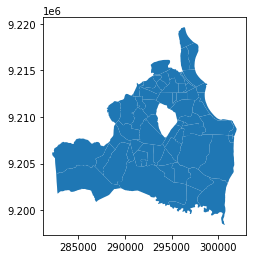

In [18]:
bairros.plot()

### Votos válidos

Para calcular os votos válidos precisamos excluir os votos brancos e nulos.

In [19]:
df = df.query('NM_VOTAVEL not in ("Branco", "Nulo")')
df['NM_VOTAVEL'].unique()

array(['JAIR BOLSONARO', 'LULA'], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2916 entries, (1, 1) to (77, 402)
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NM_VOTAVEL         2916 non-null   object 
 1   QT_VOTOS           2916 non-null   int64  
 2   QT_APTOS           2916 non-null   int64  
 3   QT_COMPARECIMENTO  2916 non-null   int64  
 4   QT_ABSTENCOES      2916 non-null   int64  
 5   NM_BAIRRO          2914 non-null   object 
 6   NR_LATITUDE        2914 non-null   float64
 7   NR_LONGITUDE       2914 non-null   float64
 8   NR_LOCAL_VOTACAO   2914 non-null   float64
 9   NM_LOCAL_VOTACAO   2914 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 257.5+ KB


### Tratando valores nulos

Existem valores nulos para os locais de votação. Vamos dar uma olhada.

In [21]:
df[df['NM_BAIRRO'].isnull()]

NM_VOTAVEL  QT_VOTOS  QT_APTOS  QT_COMPARECIMENTO  \
NR_ZONA NR_SECAO                                                          
76      389       JAIR BOLSONARO         1        36                 31   
        389                 LULA        29        36                 31   

                  QT_ABSTENCOES NM_BAIRRO  NR_LATITUDE  NR_LONGITUDE  \
NR_ZONA NR_SECAO                                                       
76      389                   5       NaN          NaN           NaN   
        389                   5       NaN          NaN           NaN   

                  NR_LOCAL_VOTACAO NM_LOCAL_VOTACAO  
NR_ZONA NR_SECAO                                     
76      389                    NaN              NaN  
        389                    NaN              NaN

Fiz uma pesquisa rápida e não encontrei. Vamos seguir como `NÃO IDENTIFICADO`.

In [22]:
df = df.fillna(value={'NM_LOCAL_VOTACAO': 'NÃO IDENTIFICADO'})

### Resultado por local de votação e candidato

Vamos agrupar por local de votação e candidato.

In [23]:
df1 = df.groupby(['NM_LOCAL_VOTACAO', 'NM_VOTAVEL']).agg({'QT_VOTOS': 'sum'})
df1

QT_VOTOS
NM_LOCAL_VOTACAO                                   NM_VOTAVEL              
ACADEMIA DE COMERCIO EPITACIO PESSOA               JAIR BOLSONARO       974
                                                   LULA                1034
ASSOCIAÇÃO DOS SERVIDORES DA POLÍCIA FEDERAL - ... JAIR BOLSONARO       741
                                                   LULA                 577
CENEC - CENTRO EDUCACIONAL CENECISTA               JAIR BOLSONARO      1425
...                                                                     ...
UFPB CENTRAL DE AULAS                              LULA                4916
UNIVERSIDADE ESTADUAL DA PARAÍBA - UEPB            JAIR BOLSONARO      2730
                                                   LULA                2604
VIA MEDICINA COLEGIO E CURSO                       JAIR BOLSONARO      1354
                                                   LULA                1107

[420 rows x 1 columns]

Um teste para saber se estou no caminho certo. Segundo o G1 Paraíba (https://g1.globo.com/pb/paraiba/noticia/2022/10/30/eleicoes-em-joao-pessoa-pb-veja-como-foi-a-votacao-no-2o-turno.ghtml):
- Lula (PT): 229.251 votos (50,10%)
- Jair Bolsonaro (PL): 228.326 votos (49,90%)

In [24]:
votos_por_candidato = df1.groupby(level=1).sum()
votos_por_candidato

,QT_VOTOS
NM_VOTAVEL,
JAIR BOLSONARO,228326
LULA,229251


In [25]:
votos_por_candidato['PERCENTUAL'] = votos_por_candidato['QT_VOTOS'] / votos_por_candidato['QT_VOTOS'].sum()
votos_por_candidato.sort_values('QT_VOTOS', ascending=False)

,QT_VOTOS,PERCENTUAL
NM_VOTAVEL,,
LULA,229251,0.501011
JAIR BOLSONARO,228326,0.498989


É isso, confere.

Agora, por local de votação.

In [26]:
df1 = df1.unstack()
df1

QT_VOTOS      
NM_VOTAVEL                                         JAIR BOLSONARO  LULA
NM_LOCAL_VOTACAO                                                       
ACADEMIA DE COMERCIO EPITACIO PESSOA                          974  1034
ASSOCIAÇÃO DOS SERVIDORES DA POLÍCIA FEDERAL - ...            741   577
CENEC - CENTRO EDUCACIONAL CENECISTA                         1425  1451
CENEC - ESCOLA CENECISTA JOÃO REGIS AMORIM                   2474  2146
CENTRO DA CIDADANIA OTAVIANO FERNANDES COUTINHO               409   466
...                                                           ...   ...
NÃO IDENTIFICADO                                                1    29
SERVICO SOCIAL DA INDUSTRIA - SESI                            190   215
UFPB CENTRAL DE AULAS                                        3297  4916
UNIVERSIDADE ESTADUAL DA PARAÍBA - UEPB                      2730  2604
VIA MEDICINA COLEGIO E CURSO                                 1354  1107

[210 rows x 2 columns]

Preciso obter as coordenadas dos locais.

In [27]:
df2 = df.groupby(['NM_LOCAL_VOTACAO']).agg({'NR_LATITUDE': 'mean', 'NR_LONGITUDE': 'mean'})

In [28]:
df2

,NR_LATITUDE,NR_LONGITUDE
NM_LOCAL_VOTACAO,,
ACADEMIA DE COMERCIO EPITACIO PESSOA,-7.122656,-34.884473
ASSOCIAÇÃO DOS SERVIDORES DA POLÍCIA FEDERAL - PROX PARQUE PB II,-7.080441,-34.836433
CENEC - CENTRO EDUCACIONAL CENECISTA,-7.163410,-34.827805
CENEC - ESCOLA CENECISTA JOÃO REGIS AMORIM,-7.177847,-34.867251
CENTRO DA CIDADANIA OTAVIANO FERNANDES COUTINHO,-7.170910,-34.838149
...,...,...
NÃO IDENTIFICADO,NaN,NaN
SERVICO SOCIAL DA INDUSTRIA - SESI,-7.123403,-34.885977
UFPB CENTRAL DE AULAS,-7.141083,-34.848948


Vamos unir os dois dataframes para chegar a uma base agregada por local de votação com as coordenadas e os votos dos candidatos pivotados para colunas.

In [29]:
result = df2.join(df1, lsuffix='COORD_', rsuffix='QT_VOTOS_')

/tmp/ipykernel_925/2064493752.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  result = df2.join(df1, lsuffix='COORD_', rsuffix='QT_VOTOS_')


In [30]:
result = result.reset_index()
result

,NM_LOCAL_VOTACAO,NR_LATITUDE,NR_LONGITUDE,"(QT_VOTOS, JAIR BOLSONARO)","(QT_VOTOS, LULA)"
0,ACADEMIA DE COMERCIO EPITACIO PESSOA,-7.122656,-34.884473,974,1034
1,ASSOCIAÇÃO DOS SERVIDORES DA POLÍCIA FEDERAL -...,-7.080441,-34.836433,741,577
2,CENEC - CENTRO EDUCACIONAL CENECISTA,-7.163410,-34.827805,1425,1451
3,CENEC - ESCOLA CENECISTA JOÃO REGIS AMORIM,-7.177847,-34.867251,2474,2146
4,CENTRO DA CIDADANIA OTAVIANO FERNANDES COUTINHO,-7.170910,-34.838149,409,466
...,...,...,...,...,...
205,NÃO IDENTIFICADO,NaN,NaN,1,29
206,SERVICO SOCIAL DA INDUSTRIA - SESI,-7.123403,-34.885977,190,215
207,UFPB CENTRAL DE AULAS,-7.141083,-34.848948,3297,4916
208,UNIVERSIDADE ESTADUAL DA PARAÍBA - UEPB,-7.157929,-34.872929,2730,2604


Calcular os votos válidos por local de votação.

In [31]:
result['QT_VOTOS_VALIDOS'] = result.iloc[:, 3:].sum(axis=1)
result

,NM_LOCAL_VOTACAO,NR_LATITUDE,NR_LONGITUDE,"(QT_VOTOS, JAIR BOLSONARO)","(QT_VOTOS, LULA)",QT_VOTOS_VALIDOS
0,ACADEMIA DE COMERCIO EPITACIO PESSOA,-7.122656,-34.884473,974,1034,2008
1,ASSOCIAÇÃO DOS SERVIDORES DA POLÍCIA FEDERAL -...,-7.080441,-34.836433,741,577,1318
2,CENEC - CENTRO EDUCACIONAL CENECISTA,-7.163410,-34.827805,1425,1451,2876
3,CENEC - ESCOLA CENECISTA JOÃO REGIS AMORIM,-7.177847,-34.867251,2474,2146,4620
4,CENTRO DA CIDADANIA OTAVIANO FERNANDES COUTINHO,-7.170910,-34.838149,409,466,875
...,...,...,...,...,...,...
205,NÃO IDENTIFICADO,NaN,NaN,1,29,30
206,SERVICO SOCIAL DA INDUSTRIA - SESI,-7.123403,-34.885977,190,215,405
207,UFPB CENTRAL DE AULAS,-7.141083,-34.848948,3297,4916,8213
208,UNIVERSIDADE ESTADUAL DA PARAÍBA - UEPB,-7.157929,-34.872929,2730,2604,5334


In [32]:
result['LULA'] = result[('QT_VOTOS', 'LULA')]
result['BOLSONARO'] = result[('QT_VOTOS', 'JAIR BOLSONARO')]

In [33]:
result = result[['NM_LOCAL_VOTACAO', 'NR_LATITUDE', 'NR_LONGITUDE', 'LULA', 'BOLSONARO', 'QT_VOTOS_VALIDOS']]

In [34]:
result

,NM_LOCAL_VOTACAO,NR_LATITUDE,NR_LONGITUDE,LULA,BOLSONARO,QT_VOTOS_VALIDOS
0,ACADEMIA DE COMERCIO EPITACIO PESSOA,-7.122656,-34.884473,1034,974,2008
1,ASSOCIAÇÃO DOS SERVIDORES DA POLÍCIA FEDERAL -...,-7.080441,-34.836433,577,741,1318
2,CENEC - CENTRO EDUCACIONAL CENECISTA,-7.163410,-34.827805,1451,1425,2876
3,CENEC - ESCOLA CENECISTA JOÃO REGIS AMORIM,-7.177847,-34.867251,2146,2474,4620
4,CENTRO DA CIDADANIA OTAVIANO FERNANDES COUTINHO,-7.170910,-34.838149,466,409,875
...,...,...,...,...,...,...
205,NÃO IDENTIFICADO,NaN,NaN,29,1,30
206,SERVICO SOCIAL DA INDUSTRIA - SESI,-7.123403,-34.885977,215,190,405
207,UFPB CENTRAL DE AULAS,-7.141083,-34.848948,4916,3297,8213
208,UNIVERSIDADE ESTADUAL DA PARAÍBA - UEPB,-7.157929,-34.872929,2604,2730,5334


Certo, temos um resultado. Mas não faz sentido os votos não estarem como inteiros.

In [35]:
result = result.astype({'LULA': 'int', 'BOLSONARO': 'int', 'QT_VOTOS_VALIDOS': 'int'})
result

,NM_LOCAL_VOTACAO,NR_LATITUDE,NR_LONGITUDE,LULA,BOLSONARO,QT_VOTOS_VALIDOS
0,ACADEMIA DE COMERCIO EPITACIO PESSOA,-7.122656,-34.884473,1034,974,2008
1,ASSOCIAÇÃO DOS SERVIDORES DA POLÍCIA FEDERAL -...,-7.080441,-34.836433,577,741,1318
2,CENEC - CENTRO EDUCACIONAL CENECISTA,-7.163410,-34.827805,1451,1425,2876
3,CENEC - ESCOLA CENECISTA JOÃO REGIS AMORIM,-7.177847,-34.867251,2146,2474,4620
4,CENTRO DA CIDADANIA OTAVIANO FERNANDES COUTINHO,-7.170910,-34.838149,466,409,875
...,...,...,...,...,...,...
205,NÃO IDENTIFICADO,NaN,NaN,29,1,30
206,SERVICO SOCIAL DA INDUSTRIA - SESI,-7.123403,-34.885977,215,190,405
207,UFPB CENTRAL DE AULAS,-7.141083,-34.848948,4916,3297,8213
208,UNIVERSIDADE ESTADUAL DA PARAÍBA - UEPB,-7.157929,-34.872929,2604,2730,5334


Melhor.

Vamos salvar o resultado parcial em um arquivo que pode ser útil fora daqui.

In [36]:
result.to_csv('eleicao_presidencial_2022_jp_2_turno_por_local_de_votacao.csv', sep=';', encoding='utf-8')

## Mapas

Vamos tentar obter alguns mapas para analisar.

<AxesSubplot: >

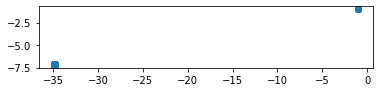

In [37]:
gdf = gpd.GeoDataFrame(
    result, geometry=gpd.points_from_xy(result.NR_LONGITUDE, result.NR_LATITUDE), crs='EPSG:4326')
gdf.plot()

Oxe. Parece que temos uma ou mais coordenadas erradas.

In [38]:
result.sort_values('NR_LONGITUDE')

,NM_LOCAL_VOTACAO,NR_LATITUDE,NR_LONGITUDE,LULA,BOLSONARO,QT_VOTOS_VALIDOS,geometry
151,ESCOLA MUNICIPAL DE ENSINO FUNDAMENTAL PROF. A...,-7.173992,-34.929570,1912,1903,3815,POINT (-34.92957 -7.17399)
66,ESC. MUN. ANAYDE BEIRIZ (PROVISÓRIO)- ENTRADA ...,-7.175178,-34.919875,1748,1662,3410,POINT (-34.91987 -7.17518)
102,ESCOLA ESTADUAL DE ENS. FUND. D. JOSE MARIA PIRES,-7.183092,-34.919803,556,578,1134,POINT (-34.91980 -7.18309)
112,ESCOLA ESTADUAL DE ENSINO FUNDAMENTAL SANTOS D...,-7.176929,-34.917247,492,615,1107,POINT (-34.91725 -7.17693)
68,ESC. MUN. LYNALDO C. DE ALBUQUERQUE - AO LADO ...,-7.178657,-34.914477,1194,1101,2295,POINT (-34.91448 -7.17866)
...,...,...,...,...,...,...,...
26,COLÉGIO IPI,-1.000000,-1.000000,365,459,824,POINT (-1.00000 -1.00000)
172,ESCOLA MUNICIPAL PROF. AFONSO PEREIRA DA SILVA,-1.000000,-1.000000,870,624,1494,POINT (-1.00000 -1.00000)
7,CENTRO DE FORMAÇÃO DE EDUCADORES DE JOÃO PESSOA,-1.000000,-1.000000,789,727,1516,POINT (-1.00000 -1.00000)
183,ESCOLA SÃO JOSÉ,-1.000000,-1.000000,739,753,1492,POINT (-1.00000 -1.00000)


Alguns locais não têm coordenadas válidas. Vamos ver quais são e corrigir isso.

### Inserindo coordenadas faltantes

In [39]:
result[result['NR_LATITUDE'] > -2]

,NM_LOCAL_VOTACAO,NR_LATITUDE,NR_LONGITUDE,LULA,BOLSONARO,QT_VOTOS_VALIDOS,geometry
7,CENTRO DE FORMAÇÃO DE EDUCADORES DE JOÃO PESSOA,-1.0,-1.0,789,727,1516,POINT (-1.00000 -1.00000)
26,COLÉGIO IPI,-1.0,-1.0,365,459,824,POINT (-1.00000 -1.00000)
61,ESC. ESTADUAL PADRE IBIAPINA,-1.0,-1.0,505,449,954,POINT (-1.00000 -1.00000)
172,ESCOLA MUNICIPAL PROF. AFONSO PEREIRA DA SILVA,-1.0,-1.0,870,624,1494,POINT (-1.00000 -1.00000)
183,ESCOLA SÃO JOSÉ,-1.0,-1.0,739,753,1492,POINT (-1.00000 -1.00000)
197,INSTITUTO EDUCACIONAL NOSSA SENHORA DA CONCEIÇ...,-1.0,-1.0,165,181,346,POINT (-1.00000 -1.00000)


Pesquisei no Google Maps e cheguei a essas coordenadas.

In [40]:
coords = {
    'CENTRO DE FORMAÇÃO DE EDUCADORES DE JOÃO PESSOA': (-7.172783, -34.836622),
    'COLÉGIO IPI': (-7.207003, -34.842519),
    'ESC. ESTADUAL PADRE IBIAPINA': (-7.099499, -34.865680), # não é Mandacaru, e sim Alto do Céu
    'ESCOLA MUNICIPAL PROF. AFONSO PEREIRA DA SILVA': (-7.177313, -34.818340),
    'ESCOLA SÃO JOSÉ': (-7.121386, -34.869185),
    'INSTITUTO EDUCACIONAL NOSSA SENHORA DA CONCEIÇÃO - IENSC': (-7.203284, -34.846888),
}

for index in result[result['NR_LATITUDE'] == -1.0].index:
    result.loc[index, 'NR_LATITUDE'] = coords[result.loc[index, 'NM_LOCAL_VOTACAO']][0]
    result.loc[index, 'NR_LONGITUDE'] = coords[result.loc[index, 'NM_LOCAL_VOTACAO']][1]

In [41]:
gdf = gpd.GeoDataFrame(
    result, geometry=gpd.points_from_xy(result.NR_LONGITUDE, result.NR_LATITUDE), crs='EPSG:4326')

In [42]:
gdf = gdf.to_crs('EPSG:31985')

Vamos plotar e ver se deu certo.

<AxesSubplot: >

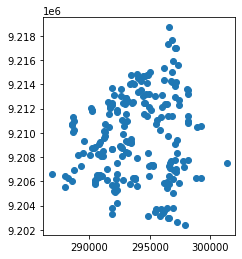

In [43]:
gdf.plot()

Conheço essa cidade rs. Vamos ver com a base de bairros que carregamos anteriormente.

<AxesSubplot: >

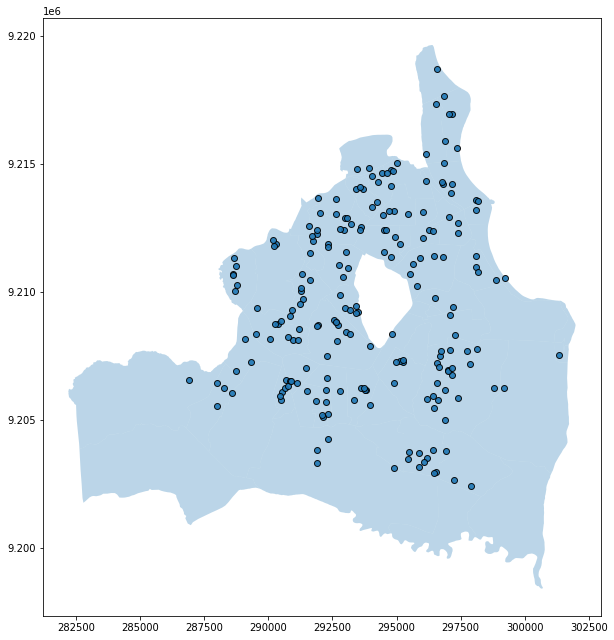

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(11,11))
bairros.plot(ax=ax, alpha=0.3, zorder=1)
gdf.plot(ax=ax, alpha=0.9, edgecolor='k', zorder=2)

### Mapa dos locais de votação segundo candidato com melhor desempenho

A ideia é ver onde cada candidato se saiu melhor.

In [45]:
import folium

In [46]:
gdf = gdf[gdf['NM_LOCAL_VOTACAO'] != 'NÃO IDENTIFICADO']
gdf

,NM_LOCAL_VOTACAO,NR_LATITUDE,NR_LONGITUDE,LULA,BOLSONARO,QT_VOTOS_VALIDOS,geometry
0,ACADEMIA DE COMERCIO EPITACIO PESSOA,-7.122656,-34.884473,1034,974,2008,POINT (291876.187 9212267.351)
1,ASSOCIAÇÃO DOS SERVIDORES DA POLÍCIA FEDERAL -...,-7.080441,-34.836433,577,741,1318,POINT (297165.064 9216957.874)
2,CENEC - CENTRO EDUCACIONAL CENECISTA,-7.163410,-34.827805,1451,1425,2876,POINT (298154.696 9207785.093)
3,CENEC - ESCOLA CENECISTA JOÃO REGIS AMORIM,-7.177847,-34.867251,2146,2474,4620,POINT (293803.677 9206170.805)
4,CENTRO DA CIDADANIA OTAVIANO FERNANDES COUTINHO,-7.170910,-34.838149,466,409,875,POINT (297015.349 9206951.020)
...,...,...,...,...,...,...,...
204,MOTIVA AMBIENTAL,-7.114607,-34.828009,2415,2841,5256,POINT (298110.808 9213182.752)
206,SERVICO SOCIAL DA INDUSTRIA - SESI,-7.123403,-34.885977,215,190,405,POINT (291710.415 9212184.152)
207,UFPB CENTRAL DE AULAS,-7.141083,-34.848948,4916,3297,8213,POINT (295809.151 9210245.133)
208,UNIVERSIDADE ESTADUAL DA PARAÍBA - UEPB,-7.157929,-34.872929,2604,2730,5334,POINT (293167.475 9208371.215)


In [47]:
m = folium.Map(
    location=[-7.146122, -34.852709], 
    zoom_start=12, 
    tiles='cartodbpositron', 
    control_scale=True
)

def get_color(label):
    color = {
        "LULA_GANHOU": '#FF0000',
        "LULA_GANHOU_MAIS_55": '#8B0000',
        "BOLSONARO_GANHOU": '#0000FF',
        "BOLSONARO_GANHOU_MAIS_55": '#00008B',
        "EMPATE": '#303030'
    }
    return color[label]

def get_label(index):
    label = 'ERRO'
    lula, bolsonaro, total = gdf.loc[index, 'LULA'], gdf.loc[index, 'BOLSONARO'], \
        gdf.loc[index, 'QT_VOTOS_VALIDOS']
    sorted_values = sorted([lula, bolsonaro], reverse=True)
    if sorted_values[0] == sorted_values[1]:
        label = 'EMPATE'
    elif lula == sorted_values[0]:
        label = 'LULA_GANHOU'
        if lula / total > 0.55:
            label = 'LULA_GANHOU_MAIS_55'
    elif bolsonaro == sorted_values[0]:
        label = 'BOLSONARO_GANHOU'
        if bolsonaro / total > 0.55:
            label = 'BOLSONARO_GANHOU_MAIS_55'
    return label

def get_popup(index):
    lula, bolsonaro, total, nome_local = gdf.loc[index, 'LULA'], gdf.loc[index, 'BOLSONARO'], \
        gdf.loc[index, 'QT_VOTOS_VALIDOS'], gdf.loc[index, 'NM_LOCAL_VOTACAO']
    def percent(value):
        return "{0:.1%}".format(value/total)
    html_votos = f"""
        <p><b>Lula</b>: {lula} ({percent(lula)})</p>
        <p><b>Bolsonaro</b>: {bolsonaro} ({percent(bolsonaro)})</p>
        <p><b>Total</b>: {total}</p>
    """
    return f"""
        <div style='width:300px'>
            <p><b>{nome_local} - 2º TURNO</b></p>
            {html_votos}
        </div>
    """

for index in gdf.index:
    label = get_label(index)
    coords_location = gdf.loc[index, 'NR_LATITUDE'], gdf.loc[index, 'NR_LONGITUDE']
    folium.CircleMarker(
        coords_location, 
        radius=7, 
        color='#FFF',
        fill_color=get_color(label),
        fill_opacity=1,
        popup=get_popup(index),
        weight=2
    ).add_to(m)

### Mapa final

Pontos em tons azuis onde Bolsonaro venceu. Pontos em tons vermelhos onde Lula venceu. Quando a cor é mais escura, significa que o candidato obteve mais de 55% dos votos válidos. A cor cinza representa empate.

In [48]:
m